In [1]:
# Example 2: Stability admittance matrix with power distribution ratios
# Connect to PowerFactory, extract network, build Y-matrix, run load flow
import sys

PF_PYTHON_API_PATH = r"C:\Program Files\DIgSILENT\PowerFactory 2024 SP4A\Python\3.12" # Path to PowerFactory Python API
sys.path.insert(0, PF_PYTHON_API_PATH)
import powerfactory as pf

# Connect to PowerFactory
app = pf.GetApplicationExt()

# Import PFD file and initialize project
from admittance_matrix.utils import import_pfd_file

pfd_file_project = "grid_models\\Radial System.pfd" # File path to the PFD file
pfd_project_name = "Radial System" # IntPrj name
import_pfd_file(app, pfd_file_project, pfd_project_name)  # Change to your project
app.Show()

In [5]:
import pandas as pd
from admittance_matrix import Network

# Create network and build matrices
net = Network(app, base_mva=100.0)

# Now apply code to calculate synchronizing power coefficients and power distribution ratios
net.run_load_flow()
DIST_GEN = "SG 11"  # <-- Enter generator name here
MODE = 1
net.reduce_to_generators(outage_source_name=DIST_GEN, MODE=MODE)

# Display reduced Y-matrix with generator names
pd.DataFrame(net.Y_reduced_matrix, index=net.gen_names, columns=net.gen_names).round(2)

Network extracted:
  Lines:              20
  Switches:           1
  Generators:         21
  Loads:              21
  Buses:              22
Excluding source admittance for: SG 11


,SG 01,SG 02,SG 03,SG 04,SG 05,SG 06,SG 07,SG 08,SG 09,SG 10,...,SG 12,SG 13,SG 14,SG 15,SG 16,SG 17,SG 18,SG 19,SG 20,SG 21
SG 01,0.34-3.97j,0.21+2.29j,0.11+0.87j,0.05+0.33j,0.03+0.12j,0.01+0.05j,0.00+0.02j,0.00+0.01j,0.00+0.00j,0.00+0.00j,...,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 02,0.21+2.29j,0.25-5.33j,0.16+1.77j,0.08+0.67j,0.04+0.25j,0.02+0.10j,0.01+0.04j,0.00+0.01j,0.00+0.01j,0.00+0.00j,...,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 03,0.11+0.87j,0.16+1.77j,0.22-5.53j,0.14+1.70j,0.08+0.64j,0.04+0.24j,0.02+0.09j,0.01+0.03j,0.00+0.01j,0.00+0.00j,...,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 04,0.05+0.33j,0.08+0.67j,0.14+1.70j,0.21-5.55j,0.14+1.69j,0.08+0.64j,0.04+0.24j,0.02+0.09j,0.01+0.03j,0.00+0.01j,...,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 05,0.03+0.12j,0.04+0.25j,0.08+0.64j,0.14+1.69j,0.21-5.56j,0.14+1.69j,0.08+0.64j,0.04+0.24j,0.02+0.09j,0.01+0.03j,...,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 06,0.01+0.05j,0.02+0.10j,0.04+0.24j,0.08+0.64j,0.14+1.69j,0.21-5.56j,0.14+1.69j,0.08+0.64j,0.04+0.24j,0.02+0.09j,...,0.00+0.01j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 07,0.00+0.02j,0.01+0.04j,0.02+0.09j,0.04+0.24j,0.08+0.64j,0.14+1.69j,0.21-5.56j,0.14+1.69j,0.08+0.64j,0.04+0.24j,...,0.01+0.03j,0.00+0.01j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 08,0.00+0.01j,0.00+0.01j,0.01+0.03j,0.02+0.09j,0.04+0.24j,0.08+0.64j,0.14+1.69j,0.21-5.56j,0.14+1.69j,0.08+0.64j,...,0.02+0.09j,0.01+0.03j,0.00+0.01j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 09,0.00+0.00j,0.00+0.01j,0.00+0.01j,0.01+0.03j,0.02+0.09j,0.04+0.24j,0.08+0.64j,0.14+1.69j,0.21-5.56j,0.14+1.69j,...,0.04+0.24j,0.02+0.09j,0.01+0.03j,0.00+0.01j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
SG 10,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.01j,0.01+0.03j,0.02+0.09j,0.04+0.24j,0.08+0.64j,0.14+1.69j,0.21-5.56j,...,0.08+0.64j,0.04+0.24j,0.02+0.09j,0.01+0.03j,0.00+0.01j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j


In [6]:
# Calculate power distribution ratios (returns ratios and matching gen names)
ratios, sources_name_order, sources_types = net.calculate_power_ratios(DIST_GEN, MODE)

dist_angle_mode=terminal_current: δd = angle(V) - angle(S) = -0.00 - 4.84 = -4.84 deg
Total K (excluding disturbance source) = 9.542493990270973


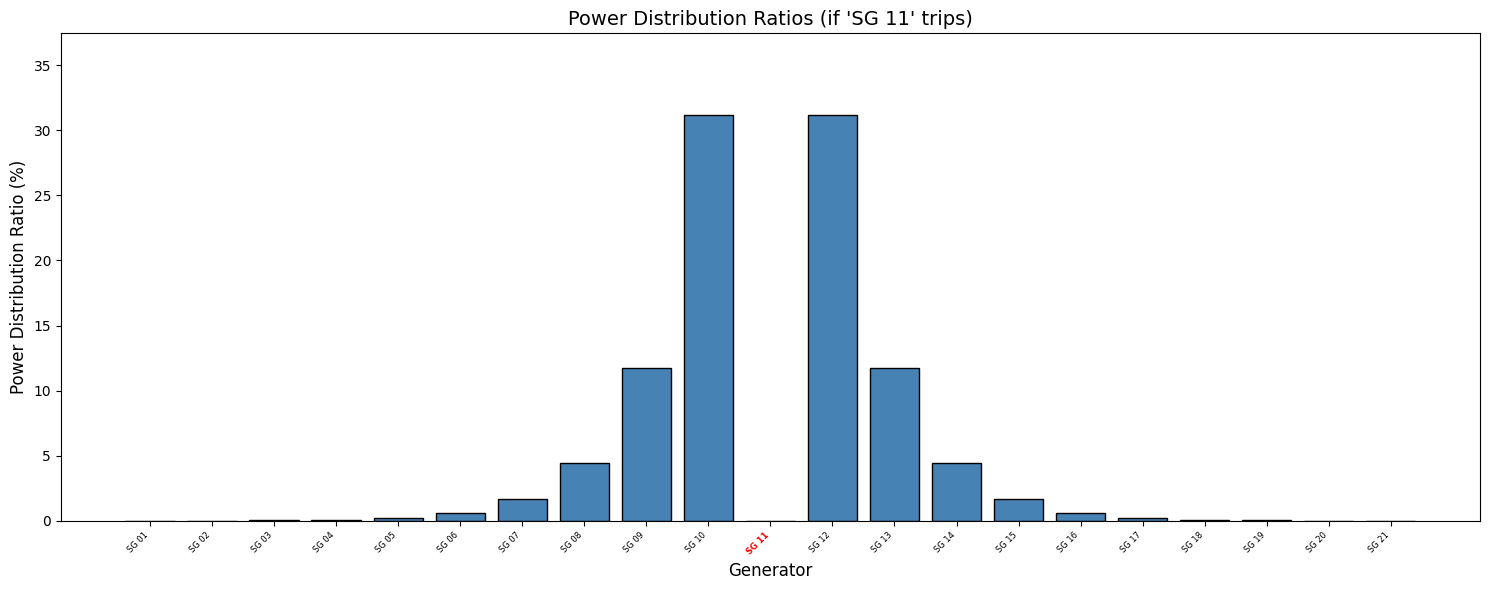

In [7]:
import matplotlib.pyplot as plt

# Create bar chart of power distribution ratios
fig, ax = plt.subplots(figsize=(15, 6))

bars = ax.bar(sources_name_order, ratios * 100, color='steelblue', edgecolor='black')

ax.set_xlabel('Generator', fontsize=12)
ax.set_ylabel('Power Distribution Ratio (%)', fontsize=12)
ax.set_title(f"Power Distribution Ratios (if '{DIST_GEN}' trips)", fontsize=14)
ax.set_ylim(0, max(ratios * 100) * 1.2 if max(ratios) > 0 else 10)

# Color the tripped generator label in red
plt.xticks(rotation=45, ha='right', fontsize=6)
for label in ax.get_xticklabels():
    if label.get_text() == DIST_GEN:
        label.set_color('red')
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()